# Vectoria

## Load libraries

In [64]:
from PIL import Image
import numpy as np
import svgwrite
import sys
from IPython.display import display

sys.path.append('../')
from src.vectoria.arg_parse import *
from src.vectoria.shared_variables import *

## Custom image functions for numpy arrays 

In [73]:
def display_as_img(image_array):
    image = Image.fromarray(np.uint8(image_array))
    display(image)
    print(image_array.shape)

## Upload image

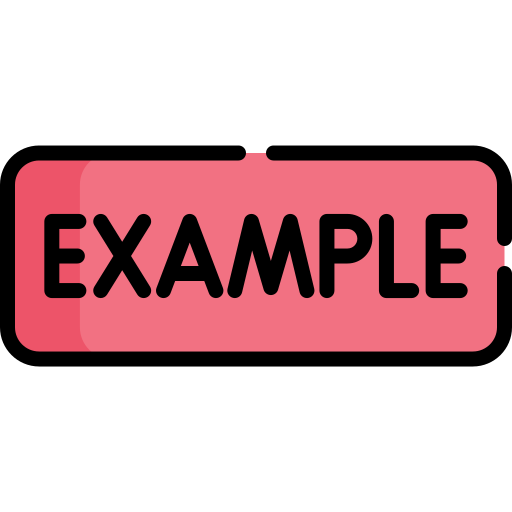

(512, 512, 4)


In [74]:
image_path="../img/example.png"
image = Image.open(image_path)
image_array = np.array(image)
display_as_img(image_array)

## Store transparencies

In [92]:
def transparent_array(image_array):
    transparent_array = np.zeros((image_array.shape[0], image_array.shape[1]), dtype=bool)
    transparent_array.shape
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            if image_array[i,j,3] == 0:
                transparent_array[i,j] = True

## Convert to greyscale

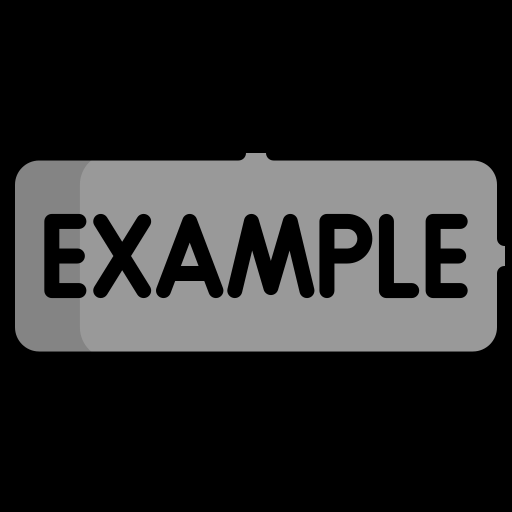

In [59]:
from PIL import Image
import numpy as np
def image_to_greyscale(image_array):
    return np.dot(image_array[...,:3], [0.2989, 0.5870, 0.1140])

img_greyscaled = image_to_greyscale(image_array)
# Assuming you have a numpy array called 'image_array'
image = Image.fromarray(np.uint8(img_greyscaled))

# Display the image
display(image)